# Project: Investigate TMDB Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this notebook, we will go throught the TMDB movie dataset which contains information about some movies. The notebook will go through the process of wrangling where we will examine the different variables in the dataset, their types and structures well as the Cleaning where the dataset will be manipulated to make the information more consisten and make it more inforative in further analysis. In this phase also some questions about the data will be examined to be examined more closely in later phases. 

Next, in the Exploratory data analysis where the different variables in the dataset will be examined as well as some relationships to develop a better understanding of the nature of the dataset and to answer some questions introduced in the data wrangling stage. 

Finally, in the introduction, a summary of observations abou the dataset and limitations will be presented.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
%matplotlib inline
#using a magic word to view the visualisations inline in the notebook


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading data and printing the first two lines to inspect them visually at first
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


taking a look at the number of null values and the type of each column


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

seeing if any of the columns could have categorical values

In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

calculating total of rows with nulls

In [5]:
df.isnull().any(axis=1).sum()

8874

check for duplicates

In [6]:
#checking the number of duplicates
df.duplicated().sum()

1

In [7]:
#viewing the duplicated row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


taking a closer look at the duplicated row with id 42194

In [8]:
df[df['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### examining the stricture of the overview column

In [9]:
print(df['overview'].iloc[0])

Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.


In [10]:
print(df['overview'].iloc[1])

An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.


In [11]:
print(df['overview'].iloc[2])

Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.


##### examining the keywords column format


In [12]:
df['keywords']

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

##### examining the production_companies column format


In [13]:
df['production_companies']

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
                               ...                        
10861                                    Bruce Brown Films
10862    Cherokee Productions|Joel Productions|Douglas ...
10863                                              Mosfilm
10864                              Benedict Pictures Corp.
10865                                            Norm-Iris
Name: production_companies, Length: 10866, dtype: object

##### examining the genres column format


In [14]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

since 'keyword', 'production_companies' and 'genres' columns contain multiple data point for each movie, they can each be separated and put in a new dataframe

## summary of exploration
1. there are 8874 rows with at least one null value
2. there is 1 duplicated entry
3. there are 3 columns that contain nonatomic data
4. overview column provides a summary of the movie's plot
5. genres and keywords could contain categorical information

## Questions to investigate:
1. Is there a correlation between vote count and vote average?
2. Is there a correlation between vote count and revenue?
3. How does the relation between budget and genre vary with each genre?

### Data Cleaning
1. remove tagline and homepage columns
2. drop duplicates
3. remove rows that contain null values
4. atomise 'keywords', 'production_companies' and 'genres' columns and put them in a new dataframes

In [15]:
#decision for each column

#  0   id                    10866 non-null  int64  
#  1   imdb_id               10856 non-null  object drop nuls
#  2   popularity            10866 non-null  float64
#  3   budget                10866 non-null  int64  
#  4   revenue               10866 non-null  int64  
#  5   original_title        10866 non-null  object 
#  6   cast                  10790 non-null  object drop nulls
#  7   homepage              2936 non-null   object drop column
#  8   director              10822 non-null  object drop nulls
#  9   tagline               8042 non-null   object drop column-- not very informative
#  10  keywords              9373 non-null   object drop nulls and atomise
#  11  overview              10862 non-null  object 
#  12  runtime               10866 non-null  int64  
#  13  genres                10843 non-null  object 
#  14  production_companies  9836 non-null   object drop nulls
#  15  release_date          10866 non-null  object 
#  16  vote_count            10866 non-null  int64  
#  17  vote_average          10866 non-null  float64
#  18  release_year          10866 non-null  int64  
#  19  budget_adj            10866 non-null  float64
#  20  revenue_adj           10866 non-null  float64

calculating number of samples without nulls that will be left after removing 'homepage' and 'tagline' columns

In [16]:
10866-df.drop(['homepage', 'tagline'], axis=1).isnull().any(axis=1).sum()

8665

dropping 'homepage' and 'tagline' columns

In [17]:
df.drop(['homepage', 'tagline'], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


drop duplicates

In [18]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(10866, 19)
(10865, 19)


dropping rows that contain nulls

In [19]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(10865, 19)
(8664, 19)


creating dataframes for nonatomic columns

In [20]:
#creatin a copy of the original dataframe
genres_df = df
genres_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [21]:
# using split to convert the genre entries in each row into a list
genres_df['genres']=genres_df['genres'].apply(str.split, args=['|'])
genres_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [22]:
#using the explode operation to create an entry for each genre separately
genres_df=genres_df.explode('genres')
genres_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


repeating the same operations as genres for keywords and production companies

In [23]:
keywords_df=df 
keywords_df['keywords']=keywords_df['keywords'].apply(str.split, args=['|'])
keywords_df=keywords_df.explode('keywords')
keywords_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,dna,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,tyrannosaurus rex,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,velociraptor,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [24]:
production_companies_df=df 
production_companies_df['production_companies']=production_companies_df['production_companies'].apply(str.split, args=['|'])
production_companies_df=production_companies_df.explode('production_companies')
production_companies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


saving the new dataframes

In [25]:
keywords_df.to_csv('keywords_df.csv')
production_companies_df.to_csv('production_companies_df.csv')
genres_df.to_csv('genres_df.csv')

ensuring id column is int in all dataframes to make sure datatypes are compatible

In [26]:
keywords_df['id'] = keywords_df['id'].astype(int)
production_companies_df['id'] = production_companies_df['id'].astype(int)
genres_df['id'] = genres_df['id'].astype(int)
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22098 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22098 non-null  int32  
 1   imdb_id               22098 non-null  object 
 2   popularity            22098 non-null  float64
 3   budget                22098 non-null  int64  
 4   revenue               22098 non-null  int64  
 5   original_title        22098 non-null  object 
 6   cast                  22098 non-null  object 
 7   director              22098 non-null  object 
 8   keywords              22098 non-null  object 
 9   overview              22098 non-null  object 
 10  runtime               22098 non-null  int64  
 11  genres                22098 non-null  object 
 12  production_companies  22098 non-null  object 
 13  release_date          22098 non-null  object 
 14  vote_count            22098 non-null  int64  
 15  vote_average       

<a id='eda'></a>
## Exploratory Data Analysis


### Examinig distributions for each variable

In [27]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8664.000000,8664.000000,8.664000e+03,8.664000e+03,8664.000000,8664.000000,8664.000000,8664.000000,8.664000e+03,8.664000e+03
mean,57002.814751,0.742008,1.771346e+07,4.926000e+07,103.829986,264.257041,6.003463,2000.127770,2.131241e+07,6.363909e+07
std,86250.004973,1.087770,3.357642e+07,1.289657e+08,26.191973,635.259827,0.893580,13.222117,3.710556e+07,1.593028e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9815.750000,0.249966,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16216.500000,0.449377,1.500000e+06,1.832440e+05,100.000000,54.000000,6.100000,2004.000000,2.143152e+06,1.912162e+05
75%,54001.000000,0.843154,2.100000e+07,3.891090e+07,113.000000,200.000000,6.600000,2011.000000,2.811526e+07,5.528980e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


we can see from df.describe an overview for the numerical variables in the dataset. we can see that in the variables: popularity, runtime and vote_count, the mean is much closer to the minimum value than the maximum whic could indicte some skew int the distribution or outliers which would suggest taking a look at the distribution of these variables visually.

In [28]:
sns.set_color_codes("muted")


#### plotting the distributions of numerical variables

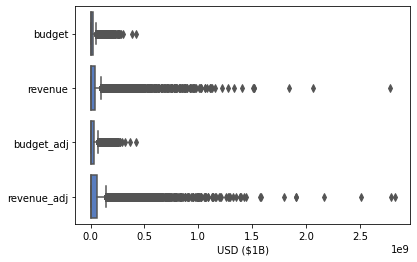

In [29]:
#plotting the distributions of revenues and budgets of movies before and after adjustment sinc they have the same unit which is dollars
sns.boxplot(data=df[['budget', 'revenue', 'budget_adj', 'revenue_adj']], orient = 'h', color='b');
plt.xlabel('USD ($1B)');

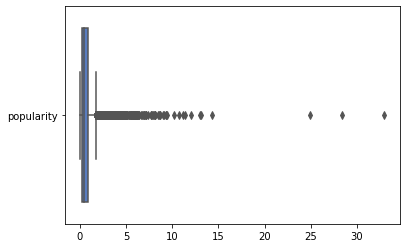

In [30]:
#plotting the distribution of movie popularity
sns.boxplot(data=df[['popularity']], orient = 'h', color='b');

<AxesSubplot:>

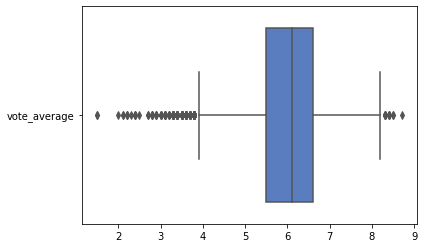

In [31]:
#plotting the distribution of average votes for movies
sns.boxplot(data=df[['vote_average']], orient = 'h', color='b')

<AxesSubplot:>

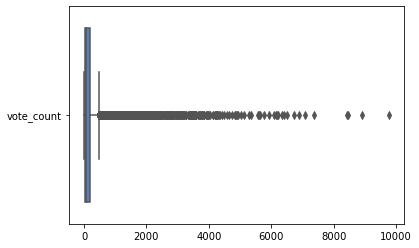

In [32]:
#plotting the distribution of vote counts
sns.boxplot(data=df[['vote_count']], orient = 'h', color='b')

<AxesSubplot:xlabel='minutes'>

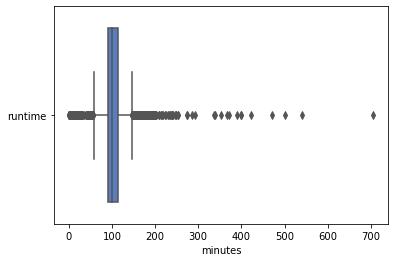

In [33]:
#plotting the distribution of runtime in minutes
plt.xlabel('minutes')
sns.boxplot(data=df[['runtime']], orient='h', color='b')

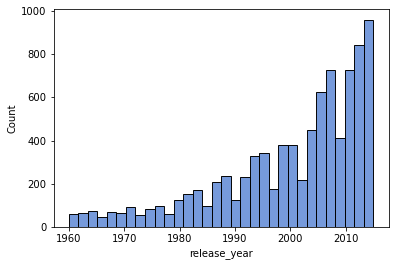

In [67]:
#plotting the distribution of release years
sns.histplot(data=df, x='release_year', color='b');

we can see here that most of the movies in the database have a release year after 2000

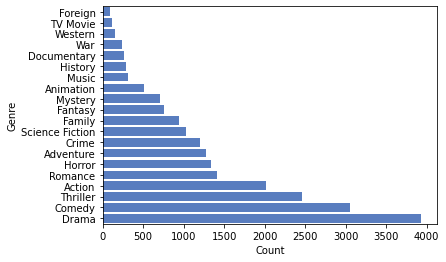

In [35]:
#viewing the ditribution of genres
sns.barplot(y=genres_df.groupby('genres').count().sort_values('id').index,x=genres_df.groupby('genres').count().sort_values('id')['id'], color='b');
plt.xlabel('Count');
plt.ylabel('Genre');

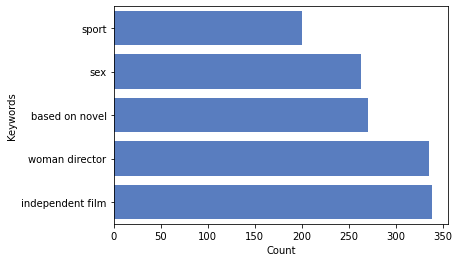

In [36]:
# viewing the occurence of the 5 most common keywords
sns.barplot(y=keywords_df.groupby('keywords').count().sort_values('id').tail(5).index,x=keywords_df.groupby('keywords').count().sort_values('id').tail(5)['id'], color='b')
plt.xlabel('Count');
plt.ylabel('Keywords');

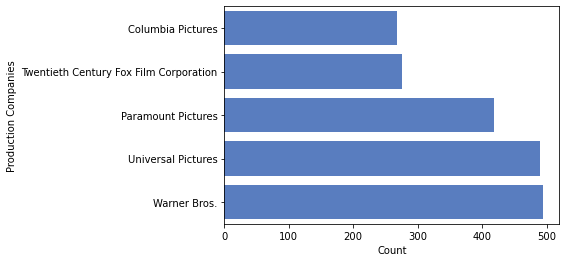

In [37]:
# viewing the occurence of the 5 most common production companies
sns.barplot(y=production_companies_df.groupby('production_companies').count().sort_values('id').tail().index, x=production_companies_df.groupby('production_companies').count().sort_values('id').tail()['id'], color='b')
plt.xlabel('Count');
plt.ylabel('Production Companies');

### Q1: Is there a correlation between vote count and vote average? 

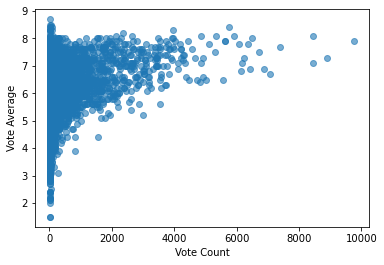

In [38]:
#plotting the relation between vote_count and vote_average
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.scatter(x=df['vote_count'], y=df['vote_average'], alpha=0.6);

In [39]:
#calculating the pearson correlation between the vote_count and vote_average columns
pearsonr(df['vote_count'], df['vote_average'])

(0.2884333412222293, 1.2490238021862324e-165)

The diagram as well as the pearson correlation show a weak correlation between vote_count and vote_average columns

### Q2: Is there a correlation between vote count and revenue?

(0.700338921541558, 0.0)

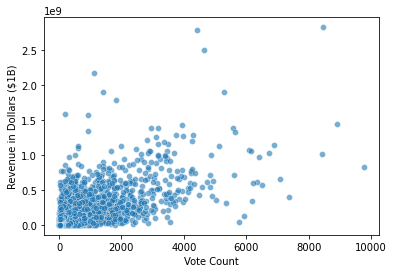

In [40]:
# plotting the relationship between vote count and adjusted revenue
plt.xlabel('Vote Count')
plt.ylabel('Revenue in Dollars ($1B)')
sns.scatterplot(x=df['vote_count'], y=df['revenue_adj'], alpha=0.6);
# calculating the pearson correlation between vote count and adjusted revenue
pearsonr(df['vote_count'], df['revenue_adj'])

there appears to be a strong positive correlation between vote count and adjusted revenue for a given movie

### Q3: How does the relation between budget and revenue vary with each genre?

In [232]:
#creating an iterator to plot the relation between budget and revenue for each genre
def plotIterator():
        '''
        docstring: this function is an iterator that goes over the genres in the dataset to generate
        a plot of the relationship between the budget and revenue of movies in this genre
        
        inputs: none
        outputs: an iterator that goes over a set of plots
        
        
        '''
        for gen in genres_df['genres'].unique():
            plt.figure(figsize=(6,4))
            data=genres_df[genres_df['genres']==gen]
            plt.title("Genre: "+gen+", correlation="+ str(round(pearsonr(data['budget_adj'],data['revenue_adj'])[0],3)))
            plt.xlabel('Budget - Constant Dollars ($100M)')
            plt.ylabel('Revenue - Constant Dollars ($1B)')
            plt.xlim(0,5*10**8)
            plt.ylim(0,2.5*10**9)
            if data['revenue_adj'].max()<5*10**8:
                plt.ylabel('Revenue - Constant Dollars ($100M)')
                plt.ylim(0,5*10**8)
            if data['budget_adj'].max()<5*10**7:
                plt.xlabel('Budget - Constant Dollars ($10M)')
                plt.xlim(0,5*10**7)
            if data['revenue_adj'].max()<5*10**7:
                plt.ylabel('Revenue - Constant Dollars ($10M)')
                plt.ylim(0,5*10**7)
            if data['budget_adj'].max()<2*10**8:
                plt.xlabel('Budget - Constant Dollars ($100M)')
                plt.xlim(0,2*10**8)

            sns.scatterplot(data=data, x='budget_adj',y='revenue_adj', alpha=0.6)
            yield
        
        

In [233]:
pltIterator=plotIterator()

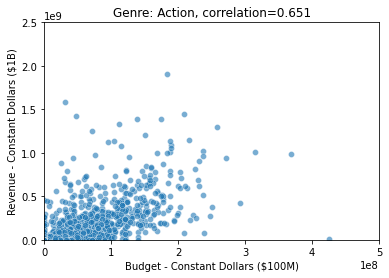

In [234]:
next(pltIterator)

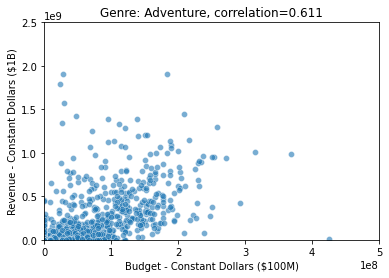

In [235]:
next(pltIterator)

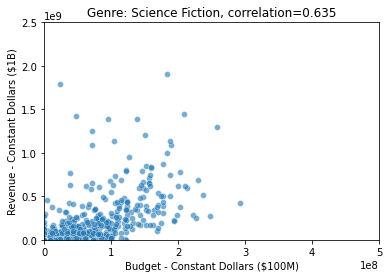

In [236]:
next(pltIterator)

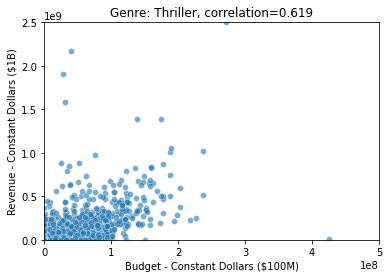

In [237]:
next(pltIterator)

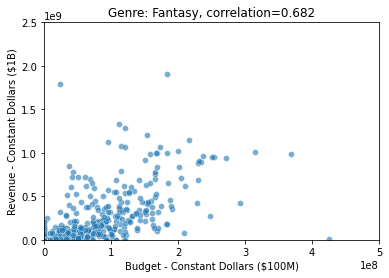

In [238]:
next(pltIterator)

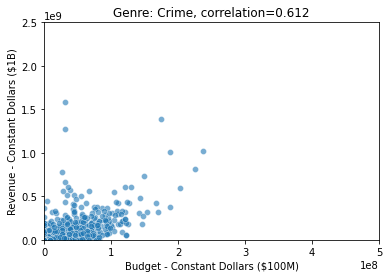

In [239]:
next(pltIterator)

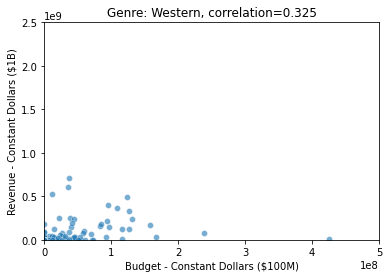

In [240]:
next(pltIterator)

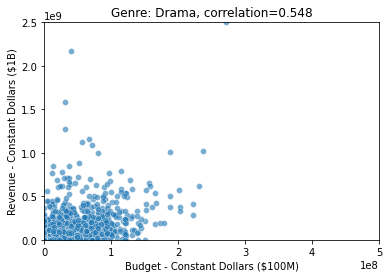

In [241]:
next(pltIterator)

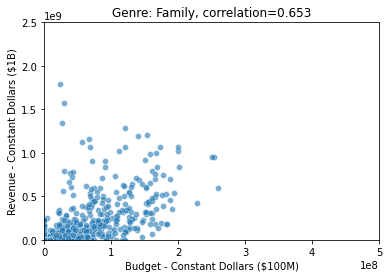

In [242]:
next(pltIterator)

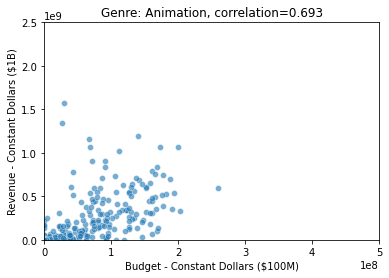

In [243]:
next(pltIterator)

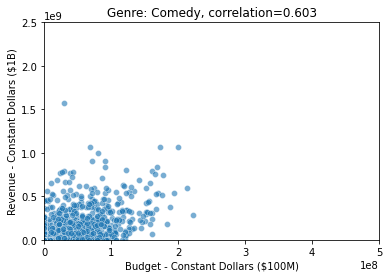

In [244]:
next(pltIterator)

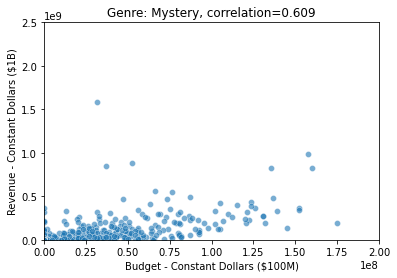

In [245]:
next(pltIterator)

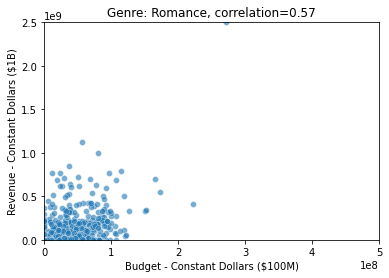

In [246]:
next(pltIterator)

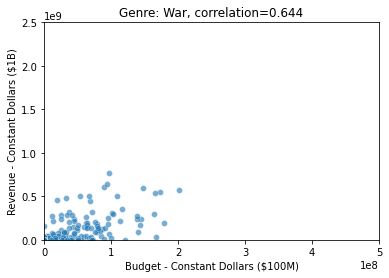

In [247]:
next(pltIterator)

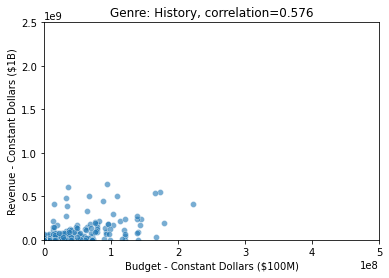

In [248]:
next(pltIterator)

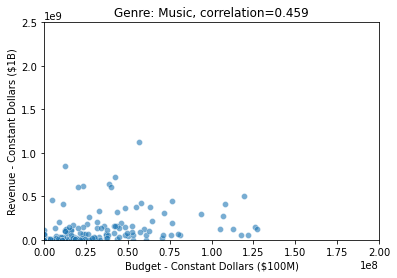

In [249]:
next(pltIterator)

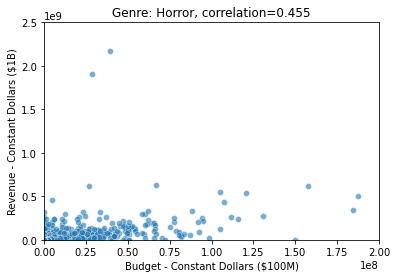

In [250]:
next(pltIterator)

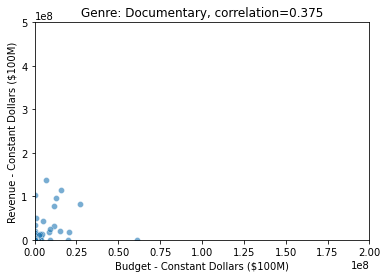

In [251]:
next(pltIterator)

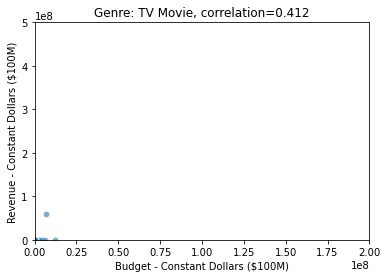

In [252]:
next(pltIterator)

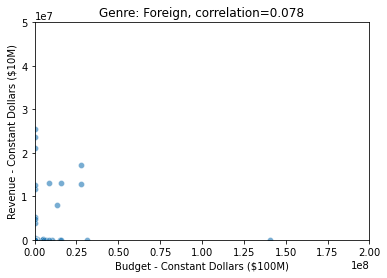

In [253]:
next(pltIterator)

Here it can be seen that there is a difference in the correlation level between the budget and revenue for different genres

<a id='conclusions'></a>
## Conclusions


#### summary report
1. Drama genre is the most common genre in the database
2. there is not a strong correlation(0.29) between vote count and vote average 
3. there is a strong correlation(0.7) between vote count and revenue 
4. animation and fantasy genres have the highest correlation between budget and revenue

#### limitations
1. some of the genres had very few samples which could result in a biased analysis
2. the effect of different genres in the same movie were not analysed
3. the data has many outliers in differnt columns such as runtime where the mean is 103 but the maximum is 705. this can also be seen in the vote_count column

#### references
https://pandas.pydata.org/docs/reference/index.html#api